<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

<h1 style="font-size:2em;color:#2467C0">Ejemplo k-means</h1>

# 1. Importar librerías generales

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

# 2. Generar datos agrupados aleatoriamente

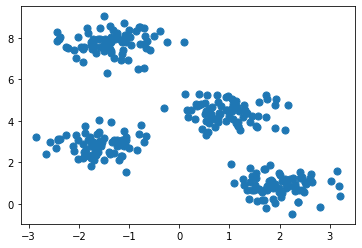

In [8]:
# La función sklearn.datasets.make_blobs que permite la generación de clusters
# de datos con distribución gausiana e isotrópica.
from sklearn.datasets import make_blobs 
X, y_true = make_blobs(n_samples=300, centers=4,  #4
                       cluster_std=0.50, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

# 3. Separar los datos en grupos y encontrar los centroides

In [13]:
#Ejecutamos el algoritmo para 7 clusters y obtenemos las etiquetas y los centroides.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([1, 2, 3, 2, 1, 1, 0, 3, 2, 2, 0, 2, 3, 2, 1, 3, 3, 1, 0, 0, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 3, 2, 2, 3, 2, 2, 2, 2, 2, 0, 1, 3, 0, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 3, 2, 0, 0, 0,
       2, 1, 2, 0, 3, 0, 2, 0, 0, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3,
       2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 3, 0, 2, 1, 2, 1, 3, 1, 1, 3, 2, 3,
       0, 0, 1, 2, 1, 3, 2, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       0, 1, 2, 0, 0, 2, 3, 2, 2, 0, 3, 0, 3, 0, 2, 3, 2, 2, 2, 3, 2, 3,
       1, 0, 2, 0, 1, 3, 2, 3, 3, 1, 3, 0, 0, 3, 1, 3, 3, 2, 1, 3, 0, 2,
       1, 1, 3, 0, 1, 3, 0, 0, 3, 3, 3, 3, 1, 2, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 2, 3, 0, 1, 0, 3, 2, 0, 2, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 1, 3,
       2, 1, 1, 0, 1, 0, 3, 2, 2, 3, 3, 2, 3, 1, 0, 3, 1, 0, 2, 0, 1, 3,
       1, 2, 2, 2, 2, 0, 0, 2, 3, 0, 1, 3, 0, 0, 0, 1, 1, 2, 3, 3, 0, 1,
       2, 0, 3, 2, 3, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1,
       2, 0, 2, 3, 1, 1, 2, 2, 2, 1, 1, 3, 2, 0])

array([[-1.57480456,  2.84532424],
       [ 1.99469693,  0.8727049 ],
       [-1.35241261,  7.76731726],
       [ 0.95415778,  4.39985544]])

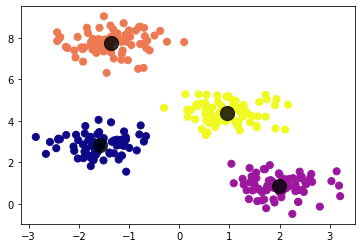

In [14]:
# Grafica de grupos con centroides y etiquetas mostradas en colores
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='plasma')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8);
centers

# 4. Método del codo

**Within Clusters Summed Squares (WCSS)** es un parámetro que representa la distancia cuadrática  de cada dato con respecto al centroide del cluster en el que se encuentra.


In [15]:
# Se obtienen los diferentes valores de WCSS 
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[2746.7762605206744,
 1121.4338468225142,
 477.68455404063826,
 147.22638625752418,
 135.0186267235778,
 122.89604586892494,
 106.80150659972324,
 98.60565644778812,
 87.97812938616954,
 81.67993182048777,
 76.30521594577812,
 71.43086689105242]

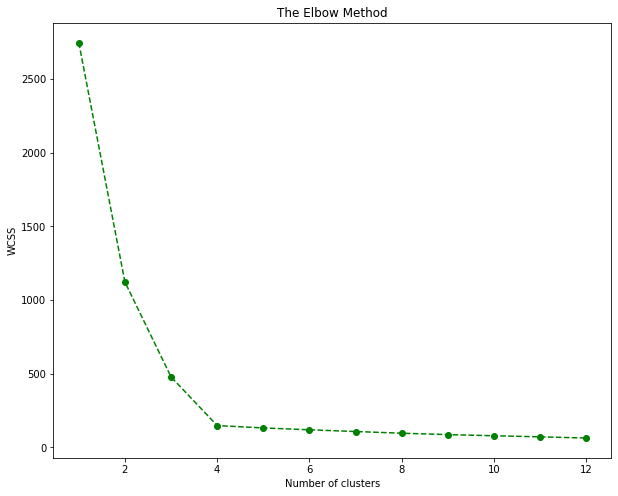

In [6]:
# Grafica de los valores de WCSS 
plt.figure(figsize=(10, 8))
plt.plot(range(1, 13), wcss,"go--")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

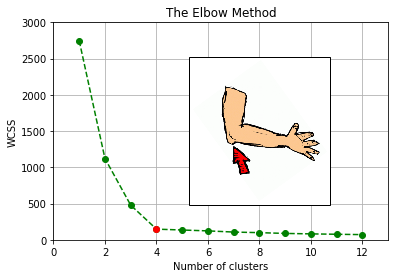

In [18]:
# Grafica de los valores de WCSS 

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots()
ax.set_xlim(0, 13)
ax.set_ylim(0, 3000)

elbow = mpimg.imread('figuras/fig_elbow.png')
imagebox = OffsetImage(elbow, zoom=0.1)

im = AnnotationBbox(imagebox, (8, 1500))
ax.add_artist(im)

plt.plot(range(1, 13), wcss,"go--")
plt.plot([4], wcss[3],"or")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

Podemos ver que el _WCSS_ disminuye conforme se aumenta el número de grupos,y esa disminución se hace cada vez más pequeña conforme aumenta el número de _clusters_. Entonces ¿cuál es el número óptimo de clusters? Donde la disminución deje de ser significativa. 

Observando la imagen superior, se puede ver que hay un cambio fuerte cuando el número de _clusters_ es _n=4_ , después de este número, los valores de _WCSS_ se van atenuando. Entonces ahí se muestra que el número óptimo de _clusters_ es 4.

Se le llama _Elbow Method_ o Método del Codo, porque ese punto donde la disminución de _WCSS_ empieza a ser menos significativa hace que la gráfica parezca un brazo semi-flexionado y  donde se encuentre la "punta del codo" representa el número óptimo de _clusters_

### _Silhouette Method_
Como ya se observo, no siempre será claro el número de _clusters_ cuando usamos _Elbow Method_ , sin embargo existe  otra opción: _The Silhoutte Method_ o Mètodo de la Silueta, traduciéndolo al español. Con este método se tiene que encontrar un valor máximo.

Para poder usar el _Silhouette Method_ hay que hacer el cálculo del _Silhouette Score_. Este parámetro  indica que tan adecuada es la clasificación de un punto con respecto al _cluster_ en el que se encuentra. La fórmula matemática que proporciona este _score_ es:

$$s(i) = \frac{b(i) - a(i)}{\mathrm{max}(a,b)}$$

Donde:
* $a(i)$ es la distancia promedio que hay entre un punto $i$ y los demás puntos **de un mismo _cluster_** o tambien dicho como _intracluster distance_
* $b(i)$ es la distancia promedio que tiene ese mismo punto $i$ con respecto a los puntos del _cluster_ más cercano.
* $\mathrm{max}(a,b)$ regresa el valor más grande (sea $a$ o $b$)

A cada _cluster_ le corresponde un _silhouette score_ que es el promedio de todos los _silhouette scores_ de todos los puntos de ese mismo cluster, y el _silhouette score_ del modelo es el promedio de los valores de los _clusters_.

En un caso ideal $a$ es un valor tan pequeño que (relativamente) tiende a cero y $b$ es un valor tan grande como infinito, entonces:
    
$$s(i) = \frac{b(i)-a(i)}{\mathrm{max}(a,b)} = \frac{\infty - 0}{\mathrm{max}(\infty,0)} = 1$$

esto significa que el modelo ha hecho bien la clasificación; mientras que el peor de los casos es cuando $a>>b$, entonces:

$$s(i) = \frac{b(i)-a(i)}{\mathrm{max}(a,b)} = \frac{0-\infty}{\mathrm{max}(\infty,0)} = -1$$

lo cual significa que el modelo se ha desempeñado muy mal.

En conclusión, entre más cercano a 1 sea el _silhouette score_ del modelo, más nos aproximamos al valor óptimo de _clusters_.

#### Aplicación del _Silhouette Method_

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score

El valor promedio del coeficiente de silueta en el modelo `kmeans` es:



In [21]:
silhouette_score(X,  kmeans.labels_)

0.3310911358188342

In [26]:
#creamos una lista de modelos de K-Means de un determinado número de clusters llamado kmeans2_sil
kmeans2_sil= [KMeans(n_clusters=i, random_state=11, init='k-means++', n_init='auto').fit(X) for i in range(1,13)]

#calculamos el silhouette score a cada modelo (de diferente número de clusters)
sil_values = [ silhouette_score(X, model.labels_, random_state=11)
                    for model in kmeans2_sil[1:]
                   ]
#Guardamos los valores de los coeficientes en un arreglo de numpy
sil_values = np.array( sil_values )
sil_values

array([0.56890369, 0.62964088, 0.73567138, 0.62620869, 0.50235005,
       0.52095407, 0.32583871, 0.32717696, 0.33338864, 0.3494892 ,
       0.34642284])

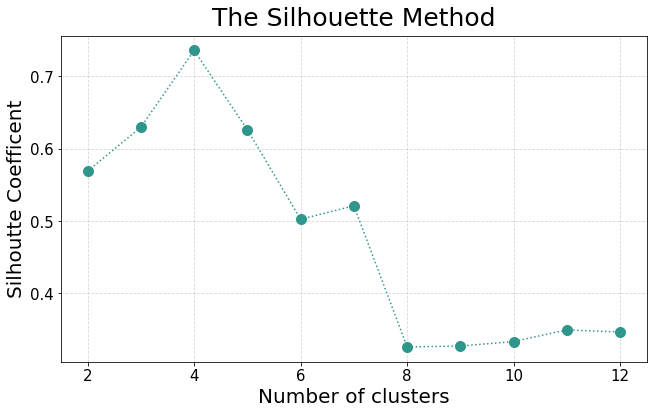

In [27]:
plt.figure( figsize=(10.5,6)       )

plt.plot(range(2, 13), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhoutte Method'
        )

#Maquillar la gráfica
plt.title('The Silhouette Method', size = 25, pad = 10)
plt.xlabel('Number of clusters', size = 20)
plt.ylabel('Silhoutte Coefficent', size = 20)
plt.tick_params( labelsize = 15 )

plt.grid(linestyle = 'dashed', alpha = 0.5 )

plt.show()

In [29]:
print( 'El valor máximo es:', sil_values[ np.argmax(sil_values) ] )
print( 'El número óptimo de clusters es:', np.argmax(sil_values) + 1 + 1 )

El valor máximo es: 0.7356713838266389
El número óptimo de clusters es: 4


### Complementación de _Elbow Method_ y _Silhouette Method_

Tener dos maneras de comprobar el número ótimo de _clusters_ es una gran herramienta. Si se cuenta con la fortuna de poder tener un conjunto de datos no etiquetadps bien "definidos", el _Elbow Method_ será más que suficiente. Sin embargo, cuando no se cuenten con ese tipo de datos, el _Silhouette Method_ será otra manera de observar el problema.


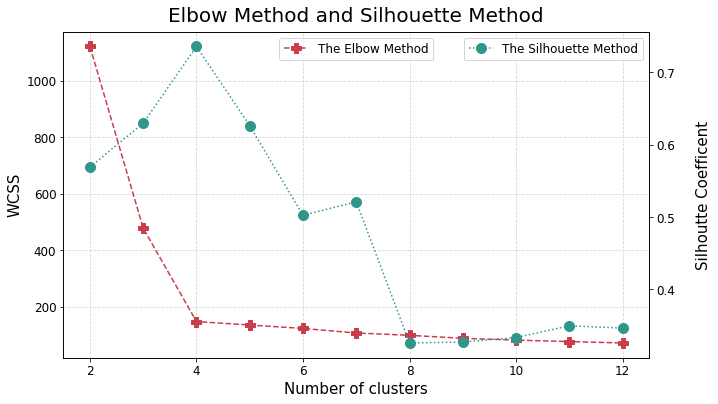

In [30]:
fig , ax1 = plt.subplots( figsize = (10.5,6) )

ax1.set_title('Elbow Method and Silhouette Method', size = 20, pad = 10 )
#--------------- WCSS -----------------
ax1.plot( range(2,13), wcss[1:],
         linestyle = '--', linewidth = 1.5,
         marker = 'P', markersize = 10,
         color = '#C83E4D' ,
         label = 'The Elbow Method'
        )

#----------- optimal number of clusters -----------------

ax1.set_xlabel( 'Number of clusters', size = 15 )
ax1.set_ylabel('WCSS', size = 15 )
ax1.tick_params( axis = 'x', labelsize = 12 )
ax1.tick_params( axis = 'y', labelsize = 12 )

plt.legend(loc='upper center', prop = {'size':12})


# ------------- silhoutte coeff -------------
ax2 = ax1.twinx()
ax2.plot( range(2,13), sil_values,
         linestyle = ':', linewidth = 1.5,
         marker = 'o', markersize = 10,
         color = '#2F968B' ,
         label = 'The Silhouette Method'
        )

ax2.set_ylabel( '\nSilhoutte Coefficent', size = 15 )
ax2.tick_params( axis = 'y', labelsize = 12 )
plt.legend(loc=0, prop = {'size':12})


ax1.grid(  linestyle = 'dashed', alpha = 0.5 )

plt.show()
